# Heirarchical Clustering Implementation

# Steps to folllow:

1.) Train test split.

2.) Scale the data, using StandardScaler.

3.) Reduce the dimensions(we need to visualize the data), using PCA.

4.) Check Performance metrics, by Silhoutte scoring.


**NOTE:**

1.) Always apply train test split before Standarization to avoid data leakage.

2.) We should always scale our data while implementing any clustering algorithm.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset

iris_data = datasets.load_iris()

In [4]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1.) Train-test split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(iris_df, iris_data.target, test_size = 0.33, random_state = 42)

In [8]:
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((100, 4), (50, 4), (100,), (50,))

# Step2: Standarization

In [9]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step3: Dimension Reduction (PCA)

In [10]:
# Converting 4D to 2D

pca = PCA(n_components = 2)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [11]:
x_train_pca.shape, x_test_pca.shape

((100, 2), (50, 2))

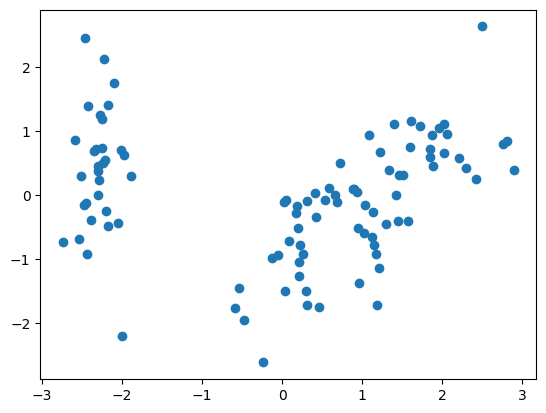

In [12]:
plt.scatter(x_train_pca[:,0], x_train_pca[:,1])

# Step4: Heirarchical Implementation

## a.) Agglomerative Clustering

#### In Heirarchical Clustering, we always need to plot Dendrogram

Text(0, 0.5, 'eucledian distance')

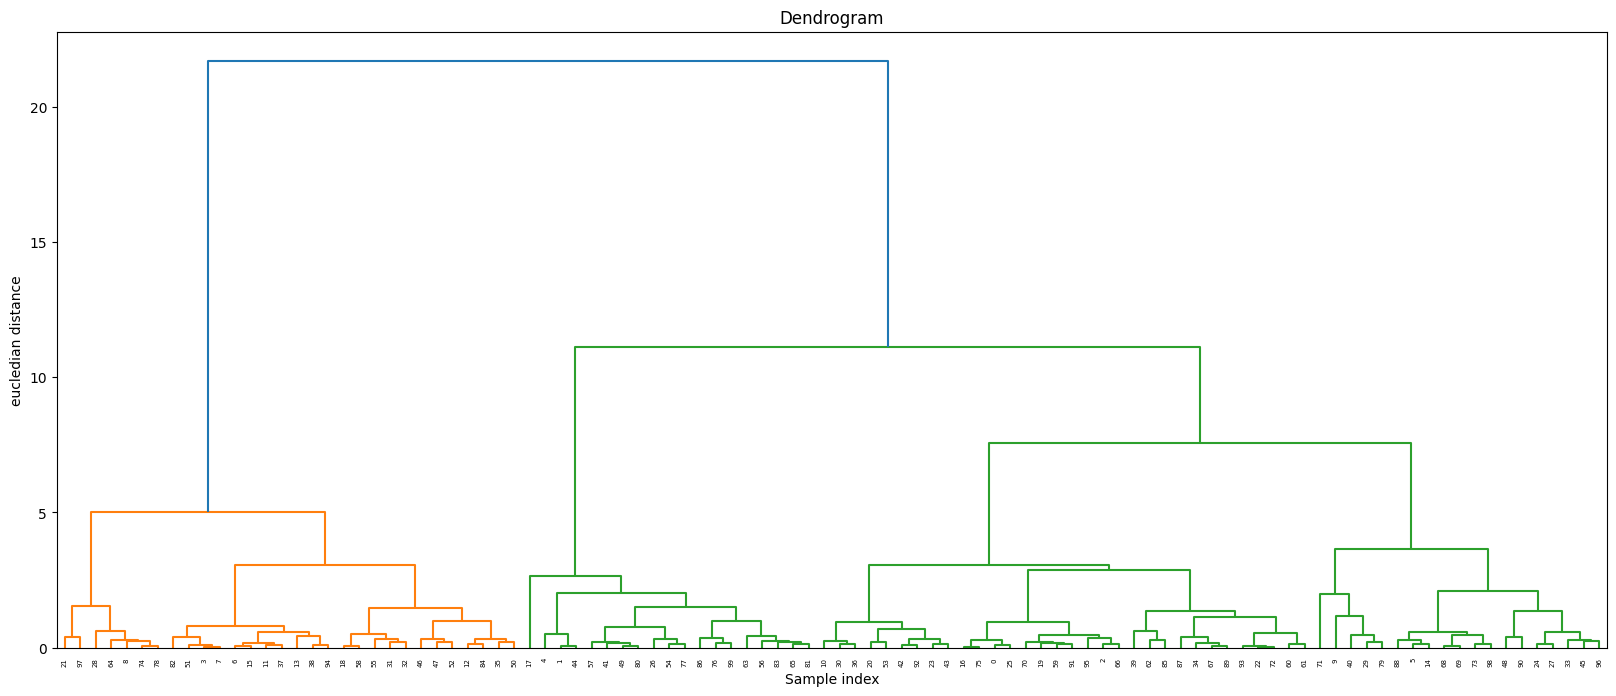

In [14]:
# To construct Dendrogram

import scipy.cluster.hierarchy as sc

# Plotting the dendrogram
plt.figure(figsize = (20,8))
plt.title('Dendrogram')

# Creating Dendrogram
sc.dendrogram(sc.linkage(x_train_pca, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('eucledian distance')

**NOTE: We can see that the Number of clusters = 2 here , the intersection point in the max length vertical line.**

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
aggCluster = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

In [19]:
aggCluster.fit(x_train_pca)

AgglomerativeClustering()

In [21]:
aggCluster.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

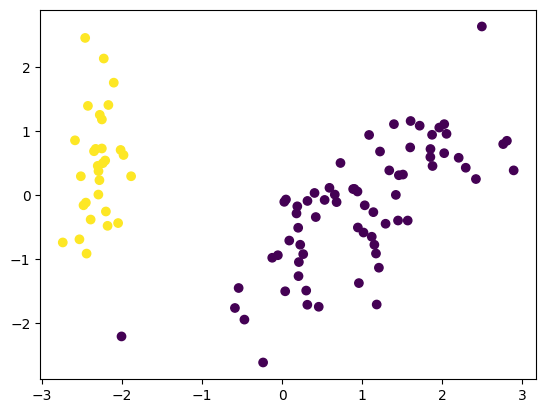

In [22]:
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c = aggCluster.labels_)

## Performance metrics

In [23]:
silt_coeff = []

for i in range(2,15):
  agglo = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'ward')
  agglo.fit(x_train_pca)
  silt_coeff.append(silhouette_score(x_train_pca, agglo.labels_))


In [24]:
silt_coeff

[0.5962733670285173,
 0.5114770349684076,
 0.4956630994379316,
 0.45100191296272235,
 0.43085794330389404,
 0.4130589646293304,
 0.406440638304992,
 0.39955810340514697,
 0.40633474321796403,
 0.41012364126037654,
 0.4036265508541485,
 0.41041055532694876,
 0.4130830905428374]

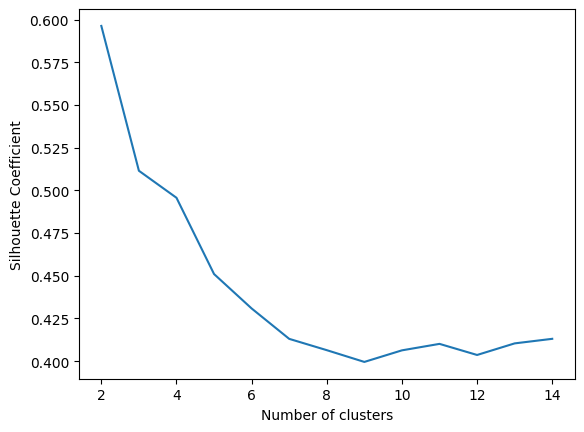

In [28]:
plt.plot(range(2,15), silt_coeff)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Analysis:

We can see that the highest silhouette score is when K = 2, means that clustering is done well and Number if clusters is really 2.